# <center>**Cluster Analysis Of Global Development Measurements**</center>

### **Objective:** Creating clusters on Global Development Measurement dataset   

### **1. Importing Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving World_development_mesurement.xlsx to World_development_mesurement.xlsx


In [3]:

data = pd.read_excel("World_development_mesurement.xlsx")
data.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [4]:
data.shape

(2704, 25)

In [5]:
data.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


### **2. Data Cleaning**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [7]:
# Check for missing values
print(data.isnull().sum())

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64


In [8]:
# Label Encoding the country column

df = data.copy()
le = LabelEncoder()

df['Country'] = le.fit_transform(df[['Country']])

In [9]:
df['Business Tax Rate'].nunique()

447

In [10]:
# Function to safely clean a column with percentage or currency symbols

def clean_column(data, column_name, strip_chars):
    if data[column_name].dtype == 'object':  # Check if column is string type
        data[column_name] = data[column_name].str.replace(strip_chars, '')

    return data

In [11]:
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,2,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,5,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,20,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,25,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,29,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [12]:
# Step 1: Data Cleaning
# Clean percentage columns and remove '%' for 'Health Exp % GDP' and 'Business Tax Rate'
clean_column(df, 'Business Tax Rate', '%')
# Clean currency columns and remove '$' and ',' for 'GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound'
df = clean_column(df, 'GDP', '$')
df = clean_column(df, 'GDP', ',')
df = clean_column(df, 'Health Exp/Capita', '$')
df = clean_column(df, 'Health Exp/Capita', ',')
df = clean_column(df, 'Tourism Inbound', '$')
df = clean_column(df, 'Tourism Inbound', ',')
df = clean_column(df, 'Tourism Outbound', '$')
df = clean_column(df, 'Tourism Outbound', ',')

In [13]:
df[['Business Tax Rate', 'GDP','Health Exp/Capita','Tourism Inbound', 'Tourism Outbound']]

,Business Tax Rate,GDP,Health Exp/Capita,Tourism Inbound,Tourism Outbound
0,NaN,54790058957,60,102000000,193000000
1,NaN,9129594819,22,34000000,146000000
2,NaN,2359122303,15,77000000,50000000
3,NaN,5788311645,152,227000000,209000000
4,NaN,2610959139,12,23000000,30000000
...,...,...,...,...,...
2699,NaN,NaN,NaN,NaN,NaN
2700,46.4,16244600000000,8895,200092000000,126573000000
2701,41.9,50004354667,1308,2222000000,1028000000
2702,61.9,381286223859,593,904000000,3202000000


In [14]:
df['Number of Records'].unique()

array([1])

In [15]:
# As there is only one unique record that is repeated enntire column in 'Number of Records'
# Dropping the column
df.drop(['Number of Records'], axis=1, inplace=True)

In [16]:
# Rename columns

df = df.rename(columns={'Birth Rate': 'BirthRate', 'Business Tax Rate': 'BusinessTaxRate','CO2 Emissions':'CO2Emissions','Days to Start Business':'DaystoStartBusiness','Ease of Business':'EaseofBusiness','Energy Usage':'EnergyUsage',
                            'Health Exp % GDP':'HealthExpGDP','Health Exp/Capita':'HealthExpCapita','Hours to do Tax':'HourstodoTax','Infant Mortality Rate':'InfantMortalityRate','Internet Usage':'InternetUsage','Lending Interest':'LendingInterest',
                            'Life Expectancy Female':'LifeExpectancyFemale','Life Expectancy Male':'LifeExpectancyMale','Mobile Phone Usage':'MobilePhoneUsage','Number of Records':'NumberofRecords','Population 0-14':'Population0to14',
                            'Population 15-64':'Population15to64','Population 65+':'Populationmorethan65','Population Total':'PopulationTotal','Population Urban':'PopulationUrban','Tourism Inbound':'TourismInbound','Tourism Outbound':'TourismOutbound'})
df.columns

Index(['BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'Country',
       'DaystoStartBusiness', 'EaseofBusiness', 'EnergyUsage', 'GDP',
       'HealthExpGDP', 'HealthExpCapita', 'HourstodoTax',
       'InfantMortalityRate', 'InternetUsage', 'LendingInterest',
       'LifeExpectancyFemale', 'LifeExpectancyMale', 'MobilePhoneUsage',
       'Population0to14', 'Population15to64', 'Populationmorethan65',
       'PopulationTotal', 'PopulationUrban', 'TourismInbound',
       'TourismOutbound'],
      dtype='object')

In [17]:
df.drop(['EaseofBusiness', 'HourstodoTax'], axis = 1, inplace=True)

In [18]:
# As there are only few records that are missing in 'PopulationUrban' column
# We have to remove the rows of those missing values.

df.dropna(subset=['PopulationUrban'], inplace=True)
print('Shape of the data:', df.shape)
print('-'*30)
print(round(df.isnull().sum() / len(df) * 100), 2)
print('-'*30)

Shape of the data: (2678, 22)
------------------------------
BirthRate                4.0
BusinessTaxRate         47.0
CO2Emissions            21.0
Country                  0.0
DaystoStartBusiness     36.0
EnergyUsage             34.0
GDP                      7.0
HealthExpGDP            11.0
HealthExpCapita         11.0
InfantMortalityRate      9.0
InternetUsage            5.0
LendingInterest         30.0
LifeExpectancyFemale     5.0
LifeExpectancyMale       5.0
MobilePhoneUsage         5.0
Population0to14          7.0
Population15to64         7.0
Populationmorethan65     7.0
PopulationTotal          0.0
PopulationUrban          0.0
TourismInbound          13.0
TourismOutbound         17.0
dtype: float64 2
------------------------------


### **3. Exploratory Data Analysis**

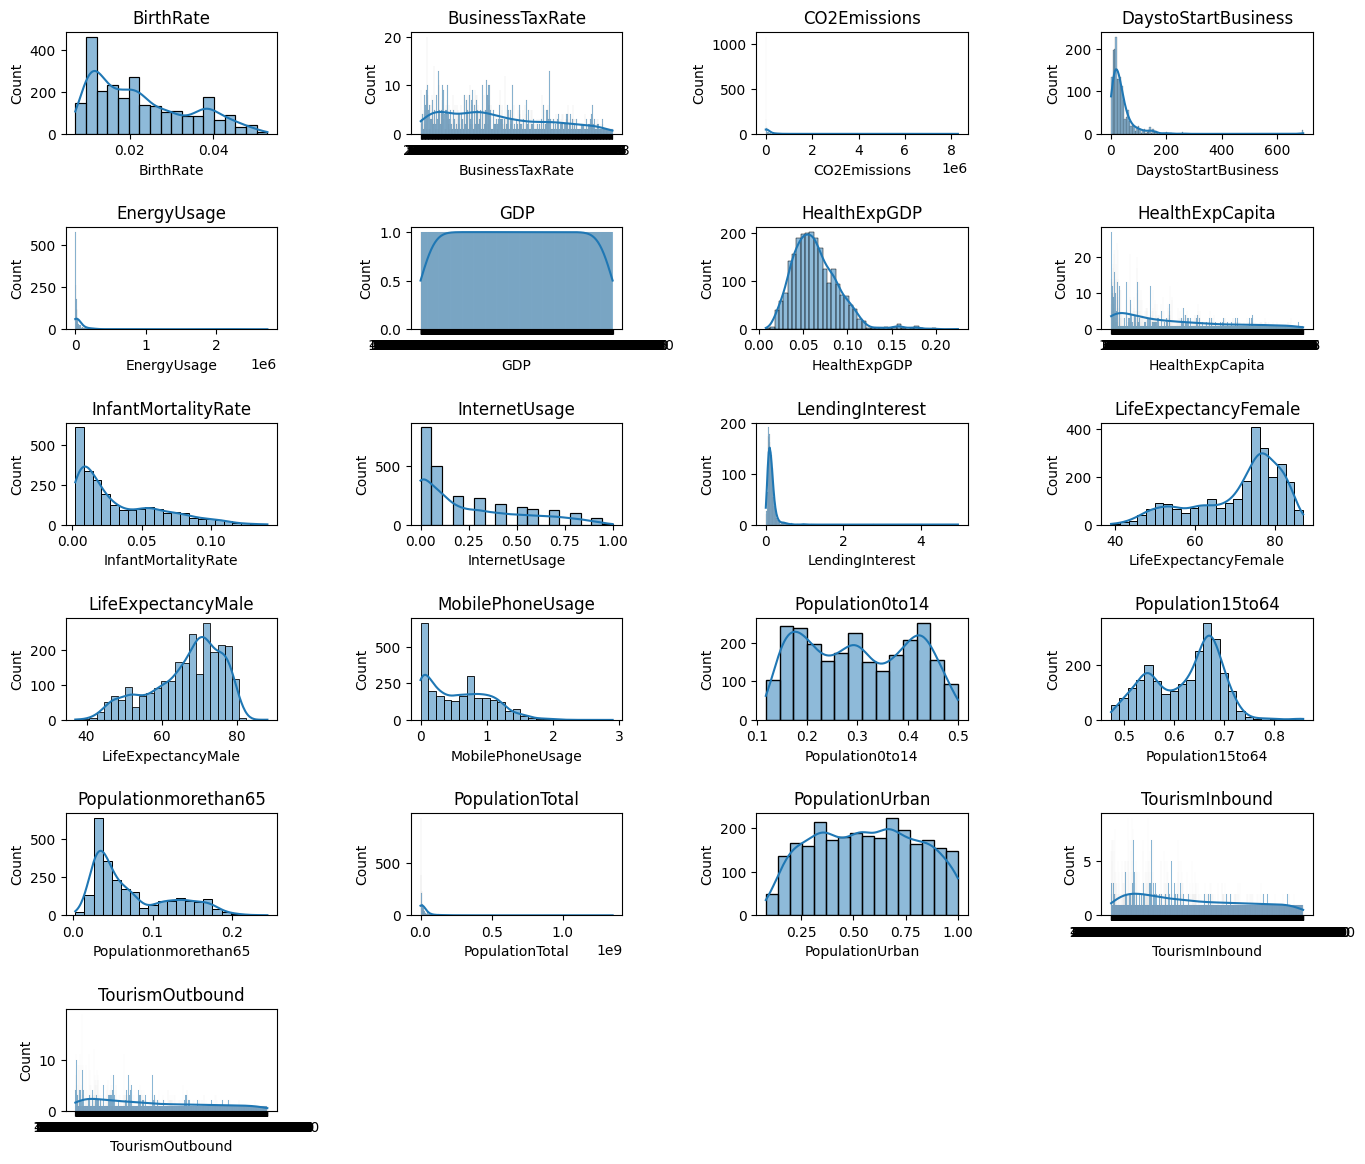

In [19]:
# Histogram of Columns

columns_to_plot = ['BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness',
                   'EnergyUsage', 'GDP', 'HealthExpGDP','HealthExpCapita', 'InfantMortalityRate',
                   'InternetUsage', 'LendingInterest', 'LifeExpectancyFemale', 'LifeExpectancyMale',
                   'MobilePhoneUsage', 'Population0to14', 'Population15to64', 'Populationmorethan65',
                   'PopulationTotal', 'PopulationUrban', 'TourismInbound', 'TourismOutbound']

n_rows = 6
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 12), sharex=False, sharey=False)

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    try:
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(col)
    except (KeyError, TypeError, ValueError) as e:
        print(f"Error plotting {col}: {e}")
        axes[i].set_axis_off()

for j in range(i + 1, n_rows * n_cols):
    axes[j].set_axis_off()

plt.tight_layout(pad=2.0)
plt.show()

In [20]:
df[['BusinessTaxRate', 'HealthExpCapita', 'GDP', 'TourismInbound', 'TourismOutbound']] = df[['BusinessTaxRate', 'HealthExpCapita', 'GDP', 'TourismInbound', 'TourismOutbound']].astype(float)

In [21]:
# Step 2: Imputation
# Fill missing values with mean for continuous numeric columns
for col in ['BusinessTaxRate', 'HealthExpGDP', 'Population0to14']:
    df[col] = df[col].fillna(df[col].mean())

median_impute = ['BirthRate', 'CO2Emissions', 'DaystoStartBusiness', 'EnergyUsage', 'HealthExpCapita', 'GDP', 'InfantMortalityRate',
                 'InternetUsage', 'LendingInterest', 'LifeExpectancyFemale', 'LifeExpectancyMale', 'MobilePhoneUsage', 'TourismInbound',
                 'TourismOutbound', 'Population15to64', 'Populationmorethan65']
for col in median_impute:
    df[col] = df[col].fillna(df[col].median())

In [22]:
print('-'*30)
print(df.isnull().sum())
print('-'*30)

------------------------------
BirthRate               0
BusinessTaxRate         0
CO2Emissions            0
Country                 0
DaystoStartBusiness     0
EnergyUsage             0
GDP                     0
HealthExpGDP            0
HealthExpCapita         0
InfantMortalityRate     0
InternetUsage           0
LendingInterest         0
LifeExpectancyFemale    0
LifeExpectancyMale      0
MobilePhoneUsage        0
Population0to14         0
Population15to64        0
Populationmorethan65    0
PopulationTotal         0
PopulationUrban         0
TourismInbound          0
TourismOutbound         0
dtype: int64
------------------------------


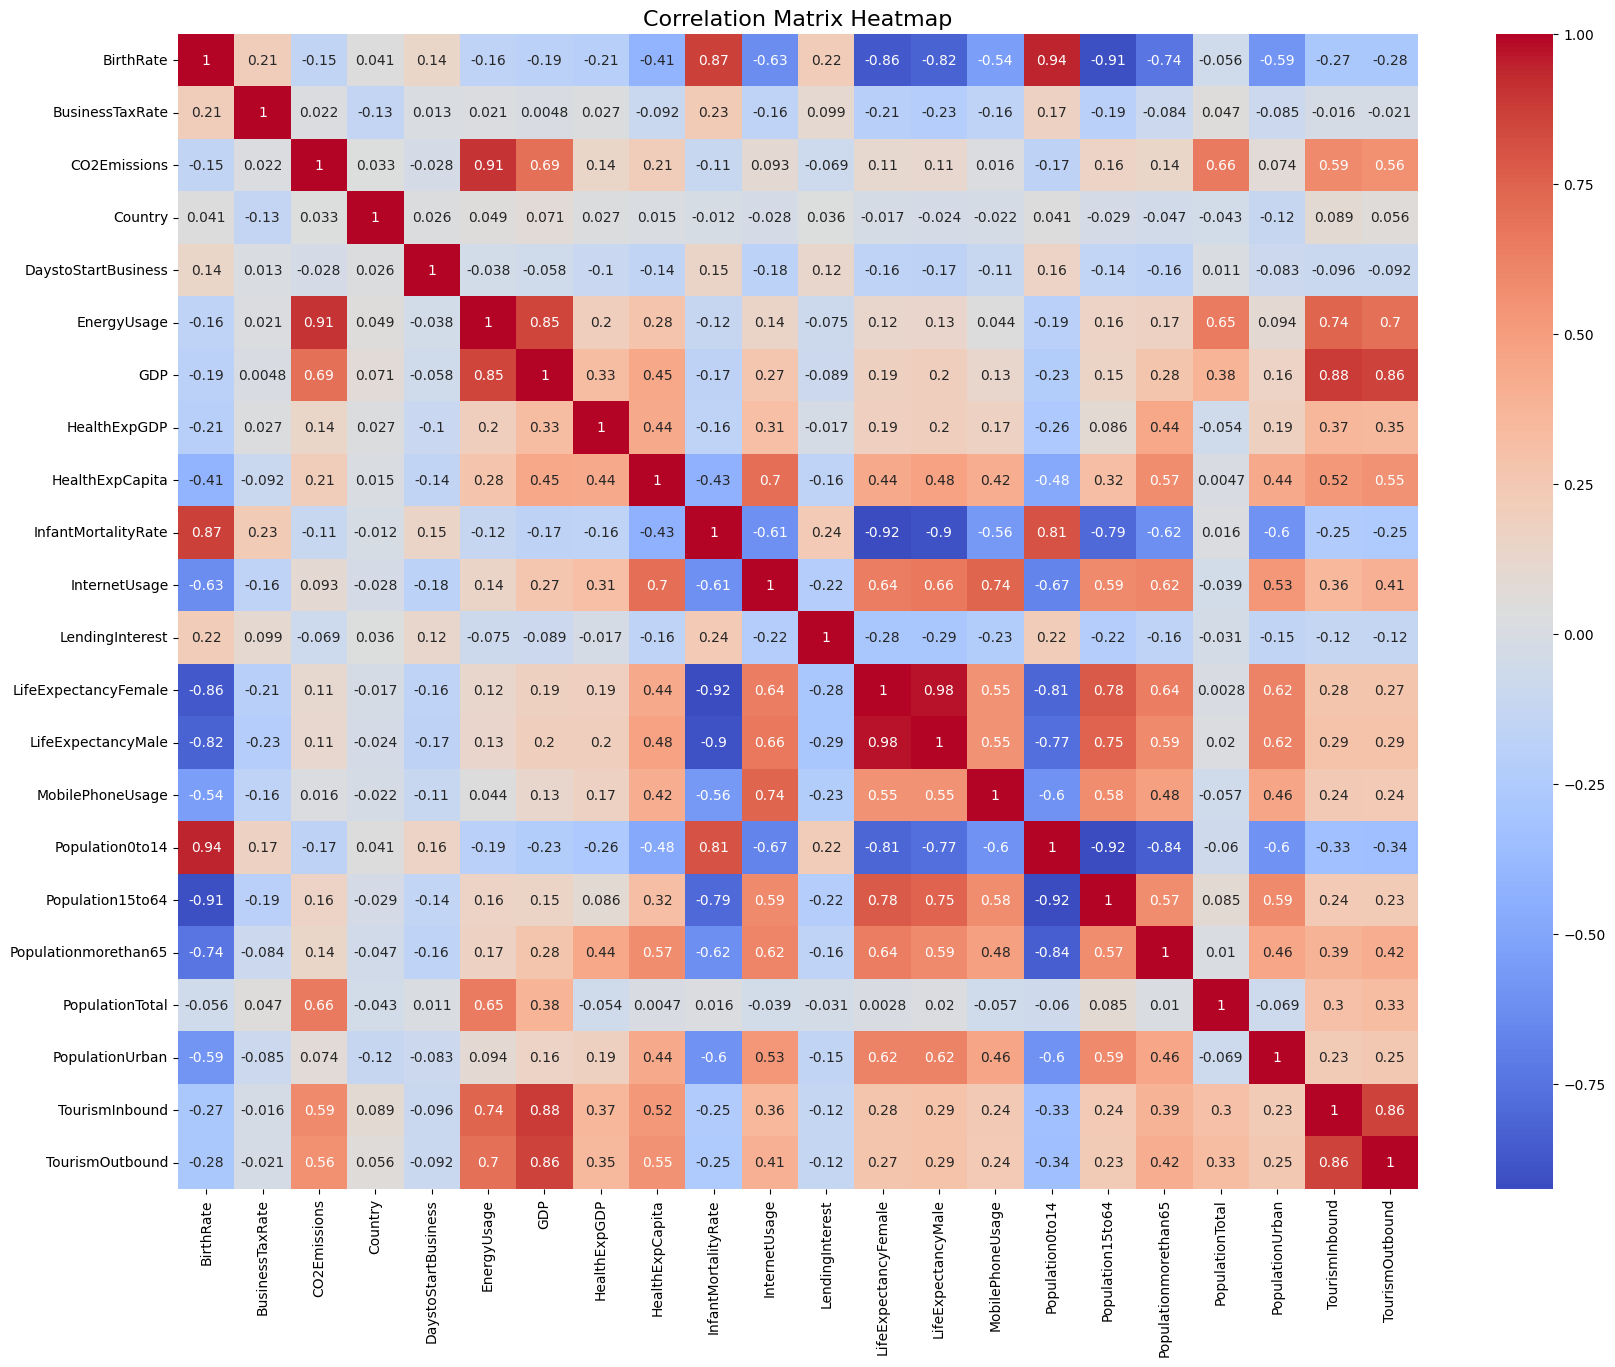

In [23]:
# Correlation Matrix Heatmap:

correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap', fontsize = 16)
plt.show()

#### **Strong Positive Correlation:**
- **EnergyUsage and BusinessTaxRate (0.91)**: This surprisingly strong positive correlation suggests that countries with higher business tax rates tend to have higher energy usage.
- **GDP and EnergyUsage (0.71)**: A positive correlation between GDP and energy usage is expected, as more developed economies generally consume more energy.

- **LifeExpectancyFemale and LifeExpectancyMale (0.98)**: Life expectancies for females and males are almost perfectly correlated.

- **Population15to64 and PopulationTotal (0.92)**: A strong positive correlation, because the 15-64 age group typically constitutes a large portion of the total population.

#### **Strong Negative Correlation:**
- **BirthRate and LifeExpectancyFemale (-0.86)**: Higher birth rates are associated with lower life expectancy for females, a common trend in demographics.

- **BirthRate and LifeExpectancyMale (-0.82)**: Similar to the above, higher birth rates correlate with lower life expectancy for males.

- **InfantMortalityRate and LifeExpectancyFemale (-0.92)**: Higher infant mortality rates are strongly linked to lower life expectancy for females.

- **InfantMortalityRate and LifeExpectancyMale (-0.9)**: Likewise, higher infant mortality correlates with lower life expectancy for males.

- **InfantMortalityRate and BirthRate (0.87)**: Higher birth rates often correspond to higher infant mortality rates, reflecting healthcare and resource availability.

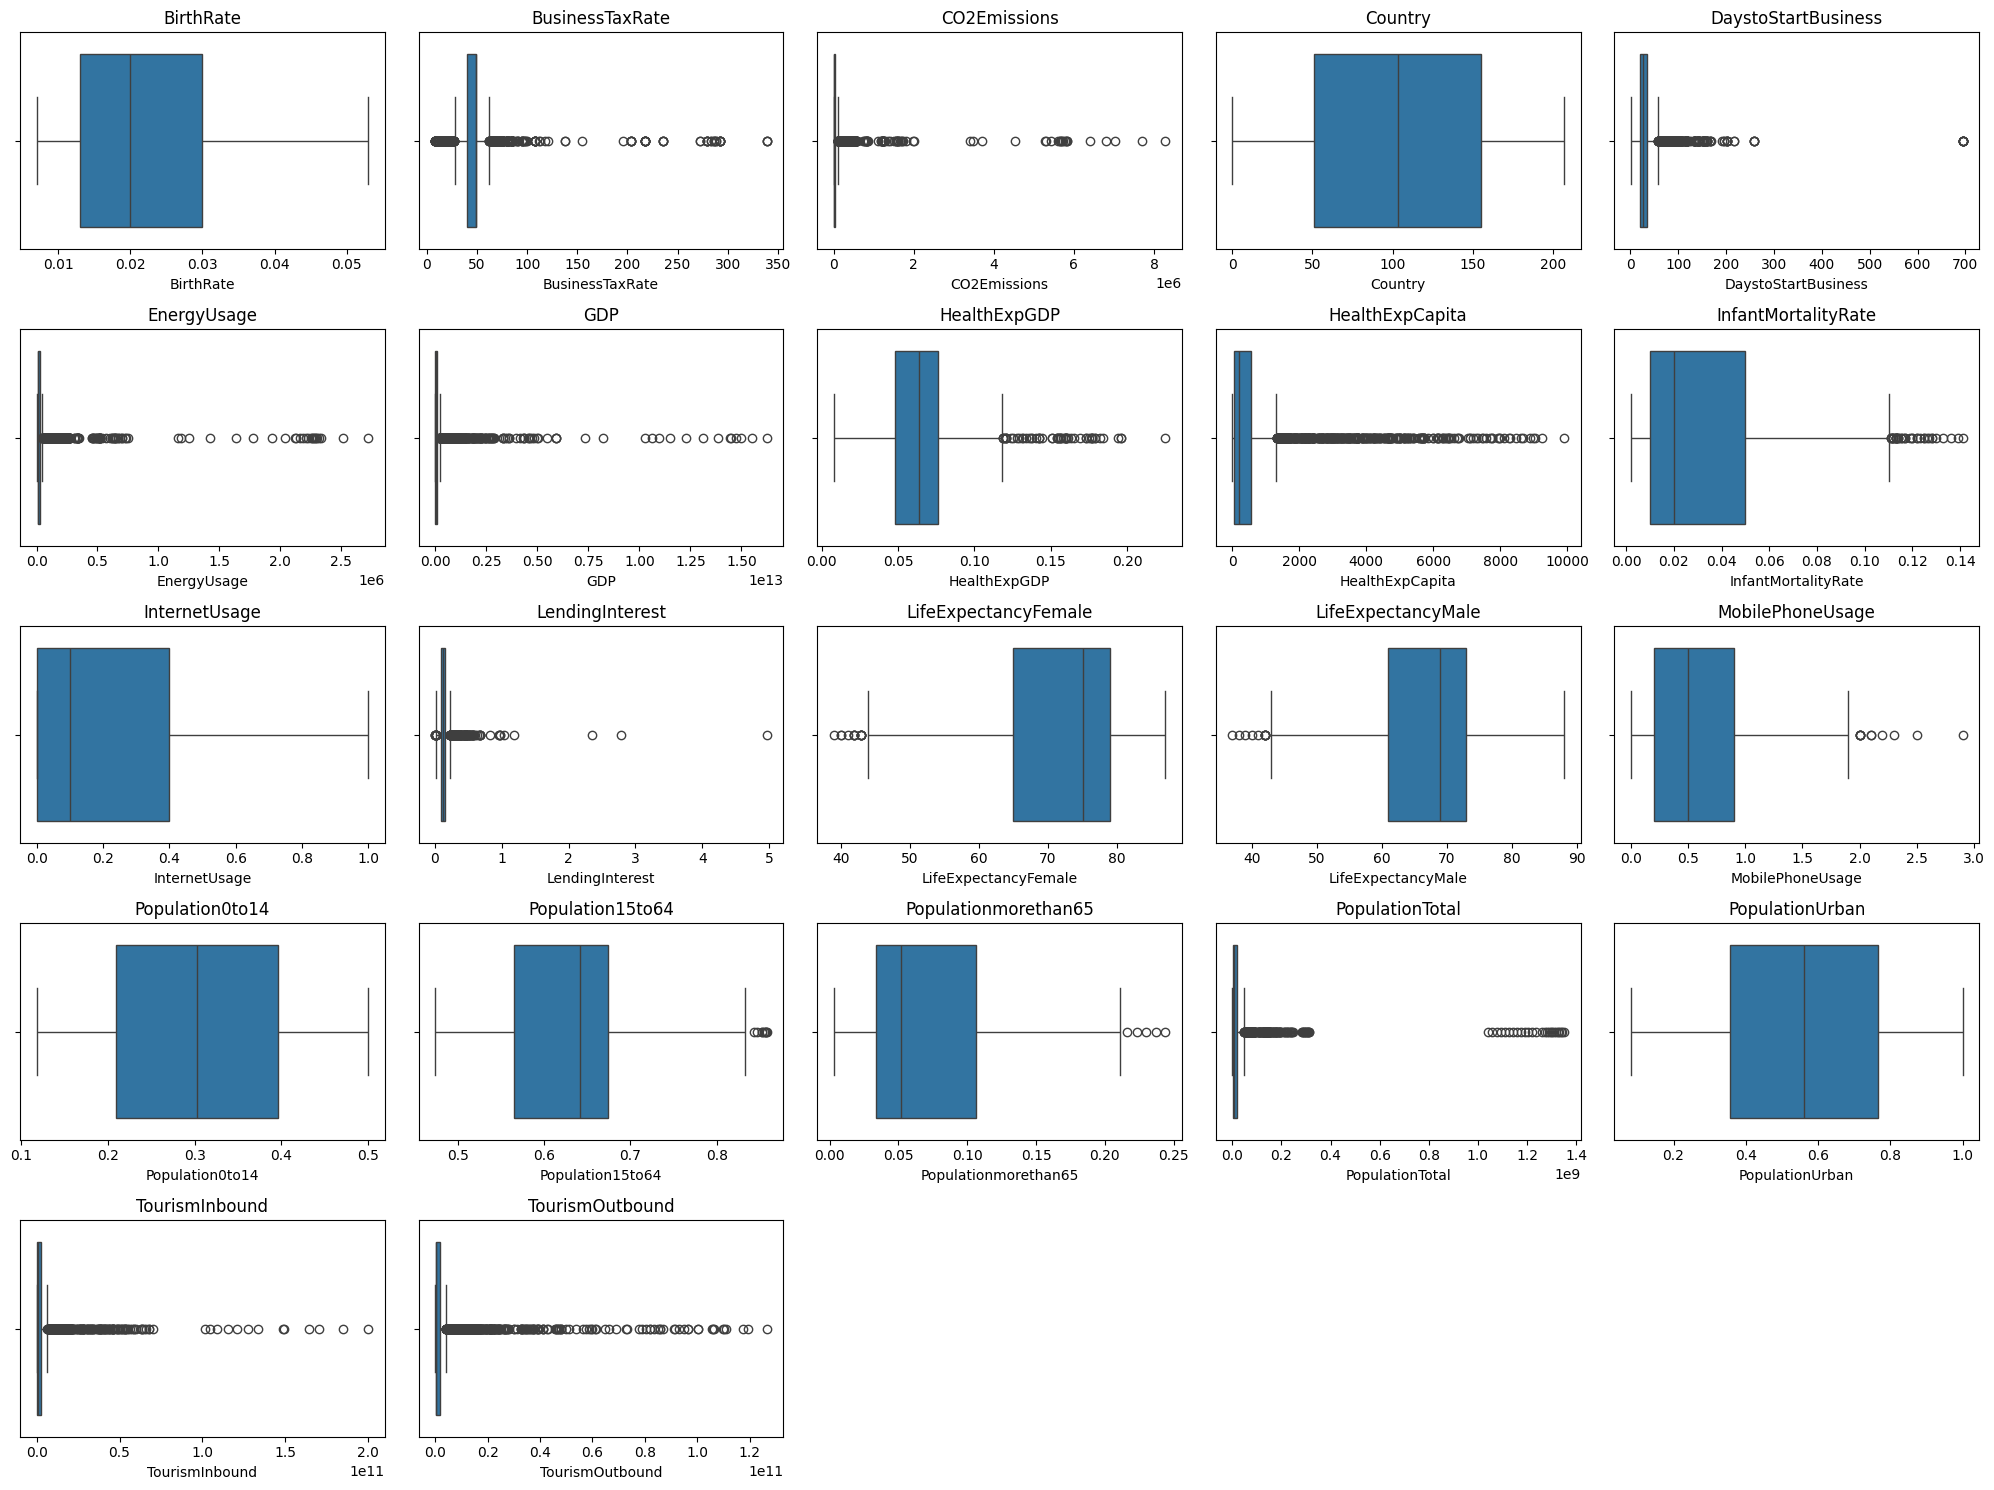

In [24]:
# Boxplot

plt.figure(figsize=(20, 15))
rows = 5
cols = 5

for i, col in enumerate(df.columns, start=1):
    plt.subplot(5, 5, i)
    sns.boxplot(data=df, x=col,orient='h')
    plt.title(col)

plt.tight_layout()
plt.show()


**This boxplot shows that there are more number of outliers present in the dataset.**

In [25]:
# Replacing the outliers with median value of the respective column

outliers_columns = ['BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness', 'EnergyUsage', 'GDP', 'HealthExpGDP', 'HealthExpCapita',
                    'InfantMortalityRate', 'LendingInterest', 'PopulationTotal', 'TourismInbound', 'TourismOutbound']

# Convert to numeric, coerce errors to NaN
for column in outliers_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Function to replace outliers with the median value of that column
def replace_outliers_iqr_median(df, column):
    valid_data = df[column].dropna()
    if valid_data.empty:
        return  # Nothing to do if the valid data is empty.
    Q1 = np.percentile(valid_data, 25)
    Q3 = np.percentile(valid_data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_val = df[column].median() # median of the entire column

    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median_val

# Applying IQR method and replacement to specified columns
for column in outliers_columns:
    replace_outliers_iqr_median(df, column)


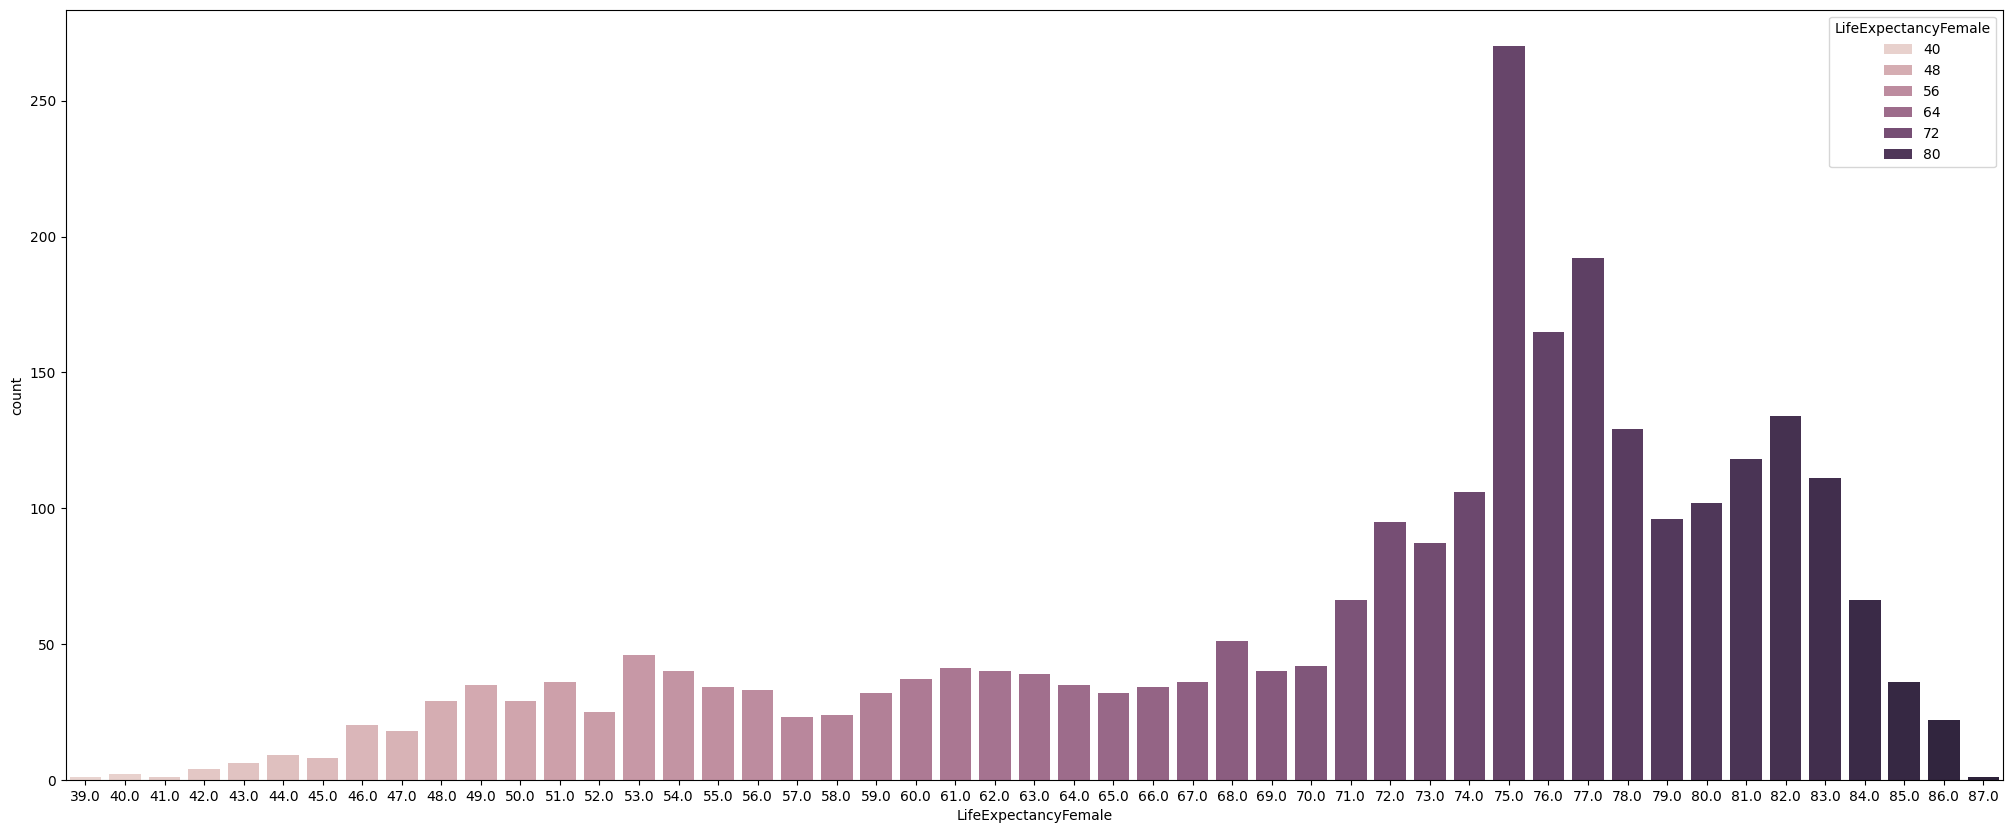

In [26]:
# Count Plot
plt.figure(figsize = (25, 10))
sns.countplot(data=df, x='LifeExpectancyFemale', hue='LifeExpectancyFemale')
plt.show()

- The most frequent life expectancy range for females appears to between 75 and 80 years.

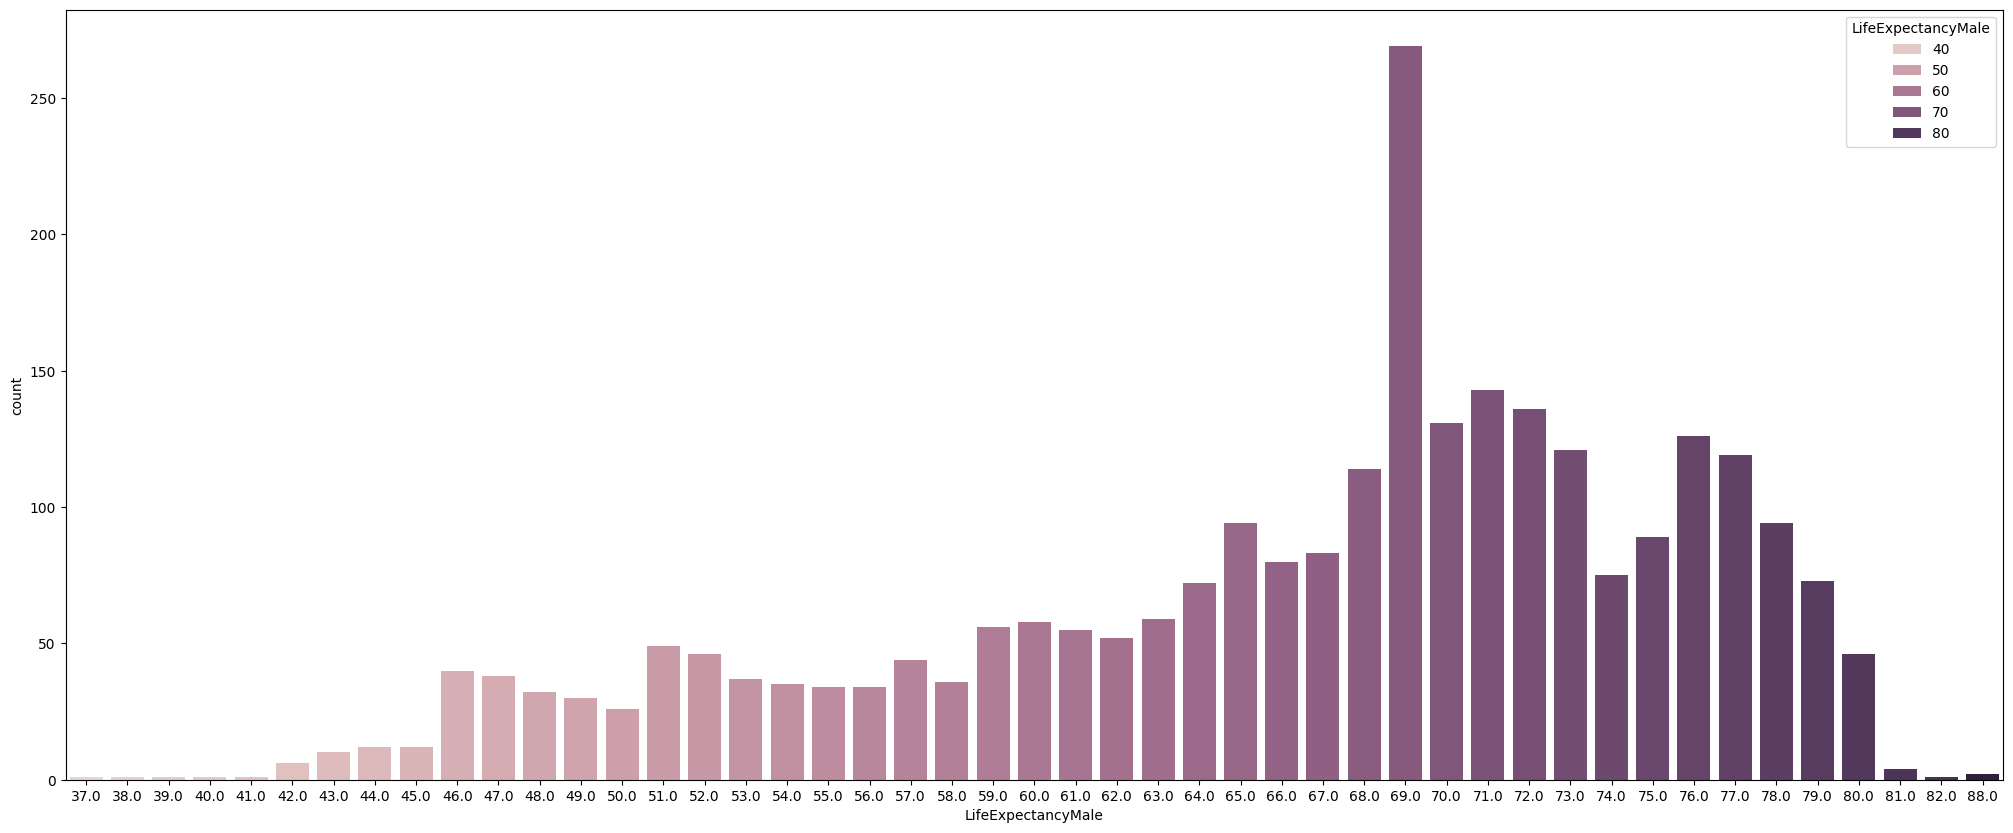

In [27]:
# Count Plot
plt.figure(figsize = (25, 10))
sns.countplot(data=df, x='LifeExpectancyMale', hue='LifeExpectancyMale')
plt.show()

-  The peak appears to be around 70 years, indicating the most common range is between approximately 68 and 72 years.

In [ ]:
# Pairplot

pairplot_columns = df[['BirthRate', 'GDP', 'LifeExpectancyFemale', 'LifeExpectancyMale', 'InternetUsage', 'EnergyUsage', 'CO2Emissions', 'TourismInbound', 'Country']]

plt.figure(figsize=(20, 15))
sns.pairplot(data=pairplot_columns, hue='Country')
plt.show()

<Figure size 2000x1500 with 0 Axes>

In [ ]:
# Scatter Plot

scatter_columns = [
    ('GDP', 'LifeExpectancyFemale'),
    ('GDP', 'LifeExpectancyMale'),
    ('GDP', 'HealthExpGDP'),
    ('InternetUsage', 'LifeExpectancyFemale'),
    ('CO2Emissions', 'GDP'),
    ('CO2Emissions', 'EnergyUsage'),
    ('BirthRate', 'InfantMortalityRate'),
    ('TourismInbound', 'GDP'),
    ('Country', 'LifeExpectancyMale')
]

# Calculate the number of scatter plots
n_scatter = len(scatter_columns)
ncols = 3
nrows = (n_scatter + ncols - 1) // ncols


plt.figure(figsize=(15, 10))


for i, (col1, col2) in enumerate(scatter_columns, start=1):
    plt.subplot(nrows, ncols, i)
    sns.scatterplot(data=df, x=col1, y=col2, hue=col1, legend=False)
    plt.title(f"{col1} vs. {col2}")

plt.tight_layout()
plt.show()

### **4. Data Transformation**

In [ ]:
# Filter out non-numeric columns for scaling
numeric_df = df.dropna()  # Drop rows with NaN values in numeric columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric data
data_scaled = scaler.fit_transform(numeric_df)
data_scaled

In [ ]:
data_scaled.shape

### **5. Cluster Analysis using Elbow Method**

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12))
visualizer.fit(data_scaled)

visualizer.show()

- The elbow curve suggests that the optimal number of clusters is 3.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(data_scaled, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix,
           orientation="top",
           distance_sort='descending',
           truncate_mode='level',
           p=12,
           show_contracted=True,
           leaf_rotation=90.,
           leaf_font_size=8.
           )

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index or Cluster Size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

- If we cut the dendrogram, it forms 3 clusters, as we obtained from the Elbow Curve Method.
- Hence, the optimum number of clusters formed will be 3 clusters.

### **1. K-Means Clustering**

In [ ]:
# Step 3: Apply KMeans Clustering
# Choosing 3 clusters based on elbow method
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

### **Principal Component Analysis**

In [ ]:
# Add the cluster assignments to the original data
df['Cluster'] = clusters

# Step 4: Visualizing the Clusters using PCA (Principal Component Analysis)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

In [ ]:
dfPCA = pd.DataFrame(data_pca, columns = ['PCA1', 'PCA2'])

In [ ]:
# Scatter plot of data points and clusters formed
plt.figure(figsize=(10,8))
sns.scatterplot(data=dfPCA, x='PCA1', y='PCA2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [ ]:
data_pca[:, 0]

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters of Countries')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

In [ ]:
# For demonstration purposes, let's create synthetic data
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)

In [ ]:
scores = []

# Evaluate silhouette scores for cluster sizes 2 to 9
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.scatter(range(2, 10), scores, label='Silhouette Scores', color='blue')
plt.plot(range(2, 10), scores, color='red', marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for Different Cluster Sizes in K-Means Clustering")
plt.xticks(range(2, 10))
plt.grid()
plt.legend()
plt.show()


In [ ]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(X)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='rainbow', s=50)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Calculate silhouette score for Agglomerative Clustering
kmeans_silhouette = silhouette_score(X, kmeans_labels)
print(f'KMeans Clustering Silhouette Score: {kmeans_silhouette:.2f}')

In [ ]:
# Define the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling step
    ('kmeans', KMeans(n_clusters=3, random_state=0))  # Clustering step
])

# Fit the pipeline to the training data
pipeline.fit(numeric_df)

# Save the fitted pipeline
import joblib
joblib.dump(pipeline, 'cluster_pipeline.pkl')

### **2. Agglomerative Clustering**

In [ ]:
# Agglomerative Clustering
agglo_model = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo_model.fit_predict(X)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=agglo_labels, cmap='rainbow', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Calculate silhouette score for Agglomerative Clustering
agglo_silhouette = silhouette_score(X, agglo_labels)
print(f'Agglomerative Clustering Silhouette Score: {agglo_silhouette:.2f}')

In [ ]:
scores = []

# Evaluate silhouette scores for cluster sizes 2 to 9
for i in range(2, 10):
    cluster = AgglomerativeClustering(n_clusters=i, linkage='average')
    cluster_labels = cluster.fit_predict(X)  # Fit and predict cluster labels
    score = silhouette_score(X, cluster_labels)  # Calculate silhouette score
    scores.append(score)  # Append score to the list

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.scatter(range(2, 10), scores, label='Silhouette Scores', color='blue')
plt.plot(range(2, 10), scores, color='red', marker='o')  # Line plot for better visualization
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for Different Cluster Sizes in Agglomerative Clustering")
plt.xticks(range(2, 10))  # Set x-ticks to cluster sizes
plt.grid()
plt.legend()
plt.show()

### **3. DBSCAN Clustering**

In [ ]:
# DBSCAN Clustering
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_values = [3, 5, 7, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan_model.fit_predict(X)

        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        if n_clusters > 1:
            dbscan_silhouette = silhouette_score(X, dbscan_labels)
            print(f'DBSCAN Silhouette Score (eps={eps}, min_samples={min_samples}): {dbscan_silhouette:.2f}')
        else:
            print(f"DBSCAN with eps={eps}, min_samples={min_samples} produced only one cluster.  Cannot calculate silhouette score.")


DBSCAN Silhouette Score (eps=0.5, min_samples=10): 0.61


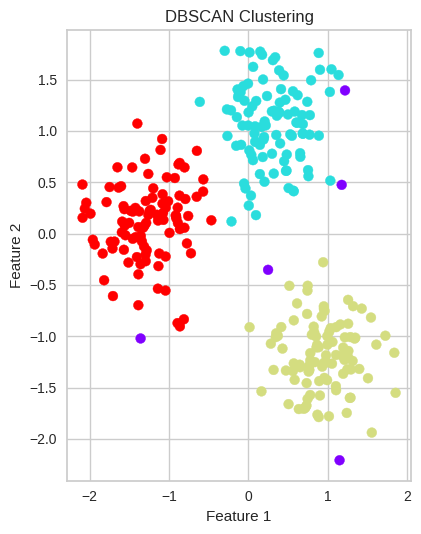

In [47]:
dbscan_model = DBSCAN(eps=0.4, min_samples=10)
dbscan_labels = dbscan_model.fit_predict(X)

dbscan_silhouette = silhouette_score(X, dbscan_labels)
print(f'DBSCAN Silhouette Score (eps={eps}, min_samples={min_samples}): {dbscan_silhouette:.2f}')

# Plotting the results
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='rainbow', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

In [48]:
silhouette_scores = [['KMeans', kmeans_silhouette], ['Agglomerative', agglo_silhouette], ['DBSCACN', dbscan_silhouette]]

data_silhouette = pd.DataFrame(silhouette_scores, columns = ['Model', 'Silhouette Scores'])
data_silhouette

,Model,Silhouette Scores
0,KMeans,0.659243
1,Agglomerative,0.659243
2,DBSCACN,0.612383


- KMeans and Agglomerative seem to be the most promising clustering methods for this dataset based on these results.
- Therefore, we prefer to finalize the KMeans Clustering model.

In [49]:
df.columns

Index(['BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'Country',
       'DaystoStartBusiness', 'EnergyUsage', 'GDP', 'HealthExpGDP',
       'HealthExpCapita', 'InfantMortalityRate', 'InternetUsage',
       'LendingInterest', 'LifeExpectancyFemale', 'LifeExpectancyMale',
       'MobilePhoneUsage', 'Population0to14', 'Population15to64',
       'Populationmorethan65', 'PopulationTotal', 'PopulationUrban',
       'TourismInbound', 'TourismOutbound', 'Cluster'],
      dtype='object')

In [50]:
#Display all columns without three dots in between
pd.set_option('display.max_columns', None)

In [51]:
df.head()

,BirthRate,BusinessTaxRate,CO2Emissions,Country,DaystoStartBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,InfantMortalityRate,InternetUsage,LendingInterest,LifeExpectancyFemale,LifeExpectancyMale,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Cluster
0,0.020,49.051656,87931.0,2,26.0,26998.0,5.479006e+10,0.035,60.0,0.034,0.0,0.100,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,102000000.0,193000000.0,1
1,0.050,49.051656,9542.0,5,26.0,7499.0,9.129595e+09,0.034,22.0,0.020,0.0,0.119,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,34000000.0,146000000.0,0
2,0.043,49.051656,1617.0,20,26.0,1983.0,2.359122e+09,0.043,15.0,0.090,0.0,0.119,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,77000000.0,50000000.0,0
3,0.027,49.051656,4276.0,25,26.0,1836.0,5.788312e+09,0.047,152.0,0.054,0.0,0.155,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,227000000.0,209000000.0,0
4,0.046,49.051656,1041.0,29,26.0,14673.0,2.610959e+09,0.051,12.0,0.096,0.0,0.119,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,23000000.0,30000000.0,0


In [52]:
df.tail(5)

,BirthRate,BusinessTaxRate,CO2Emissions,Country,DaystoStartBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,InfantMortalityRate,InternetUsage,LendingInterest,LifeExpectancyFemale,LifeExpectancyMale,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Cluster
2699,0.020,49.051656,8529.0,193,26.0,14673.0,1.549332e+10,0.06417,193.0,0.020,0.1,0.119,75.0,69.0,0.5,0.303062,0.642,0.052,32427,0.911,6.885000e+08,4.560000e+08,2
2700,0.013,46.400000,8529.0,198,5.0,14673.0,1.549332e+10,0.06400,193.0,0.006,0.8,0.033,81.0,76.0,1.0,0.196000,0.667,0.136,5971526,0.811,6.885000e+08,4.560000e+08,2
2701,0.015,41.900000,8529.0,199,7.0,14673.0,5.000435e+10,0.08900,1308.0,0.010,0.5,0.112,80.0,74.0,1.5,0.220000,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09,2
2702,0.020,61.900000,8529.0,202,26.0,14673.0,1.549332e+10,0.04600,593.0,0.013,0.5,0.164,78.0,72.0,1.0,0.288000,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09,1
2703,0.011,49.051656,8529.0,204,26.0,14673.0,1.549332e+10,0.06417,193.0,0.020,0.4,0.119,83.0,76.0,0.5,0.206000,0.641,0.152,105275,0.949,6.885000e+08,4.560000e+08,2


so from this clustering in the present notebook how could i understand that on what basis the clusters are classified

Gemini
Okay, let's figure out the basis of cluster classification in your notebook. Here's a breakdown of how you can understand the characteristics of each cluster:

1. Analyze Cluster Centers/Means:

Code:

df_cluster = df.groupby('Cluster').mean()
print(df_cluster)


Use code with caution
Reasoning: Calculate the average values for each feature within each cluster. This gives you a profile of the typical data point in each cluster.

Interpretation: For example, if Cluster 0 has a high average GDP and Life Expectancy, it might represent developed countries. Cluster 1 with lower values in these features could represent developing countries.

2. Visualize Cluster Profiles:

Code: You can create various plots to compare cluster profiles, such as bar plots, line plots, or radar charts using the df_cluster data. You already have PCA visualizations of the clusters that show their separation in a reduced dimensional space.

Reasoning: Visualizations make it easier to spot patterns and differences between clusters across multiple features.

3. Analyze Feature Importance:

Reasoning: While not explicitly provided by K-Means, you can observe the relative importance of features by looking at their contribution to cluster separation in the PCA plot or by analyzing the cluster centers. Features with large differences in means between clusters are likely more important in driving the clustering.
Example Interpretation

Let's imagine after running the cluster analysis and analyzing the df_cluster, you observe the following:

Cluster 0: High GDP, High Life Expectancy, Low Infant Mortality Rate, High Internet Usage
Cluster 1: Medium GDP, Medium Life Expectancy, Medium Infant Mortality Rate, Medium Internet Usage
Cluster 2: Low GDP, Low Life Expectancy, High Infant Mortality Rate, Low Internet Usage
Conclusion: Based on these observations, you can infer that:

Cluster 0 likely represents developed countries with strong economies, good healthcare, and widespread internet access.
Cluster 1 represents developing countries with moderate levels of development across these indicators.
Cluster 2 represents underdeveloped countries facing economic challenges, poor healthcare, and limited internet access.
In summary, by examining cluster centers, visualizing cluster profiles, and analyzing feature importance, you can gain valuable insights into the basis of cluster classification in your K-Means analysis.

In [54]:

df_cluster = df.groupby('Cluster').mean()
print(df_cluster)

         BirthRate  BusinessTaxRate  CO2Emissions     Country  \
Cluster                                                         
0         0.034666        46.164567   7071.414709  106.990807   
1         0.015891        46.652217  38791.977035  106.503132   
2         0.015631        46.405728   9830.341803   98.795082   

         DaystoStartBusiness   EnergyUsage           GDP  HealthExpGDP  \
Cluster                                                                  
0                  27.723187  11231.698672  1.207012e+10      0.055943   
1                  23.079332  22850.772443  9.988190e+10      0.063379   
2                  22.829508  11442.794262  1.525701e+10      0.066791   

         HealthExpCapita  InfantMortalityRate  InternetUsage  LendingInterest  \
Cluster                                                                         
0              74.785495             0.058474       0.034321         0.135317   
1             309.868476             0.013942       0.346973

In [53]:
import streamlit as st
import pandas as pd
import joblib

# ... (Load the pipeline)

def predict(input_df):
    # ...
    return cluster

def main():
    # ... (Streamlit app code)

    # Input fields with validation
    BirthRate = st.number_input("Birth Rate")
    # ... (other input fields)

    # Validate inputs
    if any(value == '' for value in [BirthRate, BusinessTaxRate, CO2Emissions, GDP, HealthExpCapita, InfantMortalityRate, InternetUsage, LendingInterest, LifeExpectancyFemale, MobilePhoneUsage, PopulationTotal]):
        st.error("Please fill in all input fields with numeric values.")
        return

    try:
        BirthRate = float(BirthRate)
        # ... (convert other inputs to floats)
    except ValueError:
        st.error("Invalid input. Please enter numeric values only.")
        return

    # Create input DataFrame
    input_df = pd.DataFrame({
        'BirthRate': [BirthRate],
        # ... (other features)
    })

    # Make prediction
    if st.button("Predict"):
        cluster = predict(input_df)
        st.write(f"Predicted Cluster: {cluster}")
    # ... (rest of the code)

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
df.head()

In [ ]:
df['Cluster'].value_counts()

In [ ]:
df.describe()

In [ ]:
# Finalized columns

df.drop(columns=['DaystoStartBusiness', 'EnergyUsage', 'LifeExpectancyMale', 'HealthExpGDP', 'Country', 'Population0to14', 'Population15to64', 'Populationmorethan65', 'PopulationUrban', 'TourismInbound', 'TourismOutbound'], axis=1, inplace=True)

In [ ]:
df_cluster = df.groupby('Cluster').mean()
df_cluster

In [ ]:
data.dropna(subset='Population Urban', inplace=True)

In [ ]:
final_df = pd.concat([data['Country'], df], axis=1)
# final_df.to_csv('Global_Development_Mesaurement.csv')

In [ ]:
final_df.info()